# Deep Learning - Project 1-C
## Abdul Wahab Akram
## 18L-1845

### Imports for PreProcessing

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
data = []
labels = []
im_width = 64
im_height = 64

### Pre-Processing Function

In [3]:
def preProcessing(path):
    progress = 0
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f))]
    
    for file_name in image_files:
        image_file = str(path + file_name)
        
        img = cv2.imread(image_file,cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img,(im_width,im_height))
        data.append(new_img)
        progress = progress+1
        
        if progress%1000==0:
            print('Progress '+str(progress)+' Image done')
        

### Pre-Process Images

In [4]:
preProcessing('CatsandDogs/cats/')
preProcessing('CatsandDogs/dogs/')

Progress 1000 Image done
Progress 2000 Image done
Progress 3000 Image done
Progress 4000 Image done
Progress 5000 Image done
Progress 6000 Image done
Progress 7000 Image done
Progress 8000 Image done
Progress 9000 Image done
Progress 10000 Image done
Progress 11000 Image done
Progress 12000 Image done
Progress 1000 Image done
Progress 2000 Image done
Progress 3000 Image done
Progress 4000 Image done
Progress 5000 Image done
Progress 6000 Image done
Progress 7000 Image done
Progress 8000 Image done
Progress 9000 Image done
Progress 10000 Image done
Progress 11000 Image done
Progress 12000 Image done


In [5]:
data = np.array(data)
print(data.shape)

(25000, 64, 64)


### Assign Labels to Images
#### THe first 12500 indexes of data contains images of cats while remaining contains images of dogs

In [6]:
for i in range(12500):
    labels.append('0')
for i in range(12500):
    labels.append('1')
labels = np.array(labels)

### Re-Shape data to 2D so that we can convolve on it

In [7]:
data = data.reshape((data.shape)[0],(data.shape)[1],(data.shape)[2],1)
data.shape

(25000, 64, 64, 1)

### Function to shuffle data

In [8]:
def shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

### Shuffle data and labels in unison so that images of dogs and cats in data array are mixed

In [9]:
for i in range(10):
    shuffle(data,labels)

### Import for Keras

In [10]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from time import time
from keras.callbacks import TensorBoard
import tensorflow as tf
from keras import optimizers

Using TensorFlow backend.


### Model Initilization
#### Changes made are:
##### 1. More number of filters are used in convolution layers so that more features could be extracted.
#### 2. Dropout is added after 2nd and 4th convolution layers as well as after dense layer to avoid overfitting.
#### 3. Relu activation function is used at dense layer to avoid the problem of vanishing gradients.
#### 4. Regularization of 0.01 is used to avoid overfitting.
#### 5. Learning Rate of 0.4 is used to increase learning.

In [11]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=32,input_shape=(im_width, im_height,
1),activation="relu",padding="valid"))

model.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(Dropout(0.15))

model.add(Conv2D(kernel_size=(3,3),filters=24))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=24))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(kernel_size=(5,5),filters=32,activation="relu",padding="same"))

model.add(MaxPooling2D(pool_size=(3,3)))


model.add(Flatten())
model.add(Dense(100,activation="relu",kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.4),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 24)        6936      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        13888     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 24)        13848     
__________

### Fit Model
#### Batch Size = 100, epochs = 20, Validation split = 25%

In [12]:
history = model.fit(data, labels,
          batch_size=100,
          epochs=20,
          verbose=1, shuffle = True,validation_split=0.25)

Train on 18750 samples, validate on 6250 samples
Epoch 1/20
18750/18750 [==============================] - 266s 14ms/step - loss: 2.1927 - acc: 0.5187 - val_loss: 1.6597 - val_acc: 0.5426
Epoch 2/20
18750/18750 [==============================] - 266s 14ms/step - loss: 1.3044 - acc: 0.5643 - val_loss: 1.0199 - val_acc: 0.6016
Epoch 3/20
18750/18750 [==============================] - 275s 15ms/step - loss: 0.8848 - acc: 0.6144 - val_loss: 0.7811 - val_acc: 0.6726
Epoch 4/20
18750/18750 [==============================] - 288s 15ms/step - loss: 0.7410 - acc: 0.6530 - val_loss: 0.6878 - val_acc: 0.6872
Epoch 5/20
18750/18750 [==============================] - 296s 16ms/step - loss: 0.6667 - acc: 0.6883 - val_loss: 0.6543 - val_acc: 0.6890
Epoch 6/20
18750/18750 [==============================] - 294s 16ms/step - loss: 0.6158 - acc: 0.7202 - val_loss: 0.5687 - val_acc: 0.7499
Epoch 7/20
18750/18750 [==============================] - 275s 15ms/step - loss: 0.5785 - acc: 0.7389 - val_loss: 0.6

### Error vs Epoch

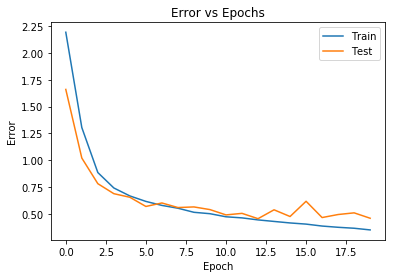

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Error vs Epochs')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Accuracy vs Epoch
#### Train Accuracy = 85.43%
#### Validation Accuracy = 80%


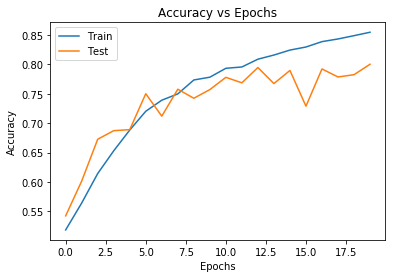

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()